In [1]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
import os
os.chdir("/gdrive/My Drive/Çalışma ortamı/")

In [3]:
!ls

 Duygu_tanima.ipynb  'matris vektor.ipynb'   save_models
 fer2013	      RakamTanima_CNN.py     Untitled6.ipynb
 images		      Rakam_Tanima.ipynb     VGG16_NesneTanima.ipynb


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

import keras
from keras.models import Sequential,Model,model_from_json
from keras.layers import Dense,Conv2D,Activation,MaxPool2D,Flatten,Dropout,BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

In [5]:
root="/gdrive/My Drive/Çalışma ortamı/"
data = pd.read_csv(root + 'fer2013/fer2013.csv')
data.shape

(35887, 3)

In [6]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [8]:
# ön işlem
np.unique(data["Usage"].values.ravel())


print('Eğitim setindeki örnek sayısı: %d'%(len(data[data.Usage == "Training"])))

Eğitim setindeki örnek sayısı: 28709


In [9]:
#eğitim
train_data=data[data.Usage=="Traning"]

In [10]:
#lise
train_data = data [data.Usage == "Training"]
train_pixels = train_data.pixels.str.split(" ").tolist()

train_pixels = pd.DataFrame(train_pixels, dtype=int)
train_images = train_pixels.values
train_images = train_images.astype(np.float)

print(train_images)

print(train_images.shape)

<ipython-input-10-36c4e8ba292a>:5: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  train_pixels = pd.DataFrame(train_pixels, dtype=int)
<ipython-input-10-36c4e8ba292a>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_images = train_images.astype(np.float)


[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


In [11]:
def show(img):
    show_image = img.reshape(48,48)

    plt.axis('off')
    plt.imshow(show_image, cmap='gray')



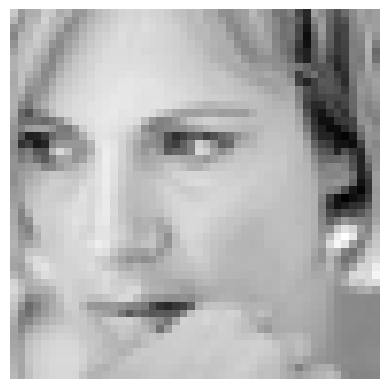

In [12]:
show(train_images[48])

In [13]:
train_labels_flat=train_data["emotion"].values.ravel()
train_labels_count=np.unique(train_labels_flat).shape[0]
print("farkli yüz sayisi: %d"%train_labels_count)

farkli yüz sayisi: 7


In [14]:
def dense_to_one_hot(labels_dense,num_classed):
  num_labels=labels_dense.shape[0]
  index_offset=np.arange(num_labels)*num_classed
  labels_one_hot=np.zeros((num_labels,num_classed))
  labels_one_hot.flat[index_offset+labels_dense.ravel()]=1
  return labels_one_hot

In [15]:
y_train=dense_to_one_hot(train_labels_flat,train_labels_count)

y_train=y_train.astype(np.uint8)

print(y_train.shape)

(28709, 7)


In [16]:

np.unique(data["Usage"].values.ravel())

print('test setindeki örnek sayısı: %d'%(len(data[data.Usage == "PublicTest"])))

test setindeki örnek sayısı: 3589


In [17]:
test_data=data[data.Usage=="PublicTest"]

test_pixels = test_data.pixels.str.split(" ").tolist()

test_pixels = pd.DataFrame(test_pixels, dtype=int)
test_images = test_pixels.values
test_images = test_images.astype(np.float)

print(test_images)

print(test_images.shape)

<ipython-input-17-6a77d2d52a2c>:5: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  test_pixels = pd.DataFrame(test_pixels, dtype=int)


[[254. 254. 254. ...  42. 129. 180.]
 [156. 184. 198. ... 172. 167. 161.]
 [ 69. 118.  61. ...  88.  87.  90.]
 ...
 [255. 255. 255. ...  48.  50.  46.]
 [ 33.  25.  31. ...   4.   5.   4.]
 [ 61.  63.  59. ... 113. 165. 180.]]
(3589, 2304)


<ipython-input-17-6a77d2d52a2c>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_images = test_images.astype(np.float)


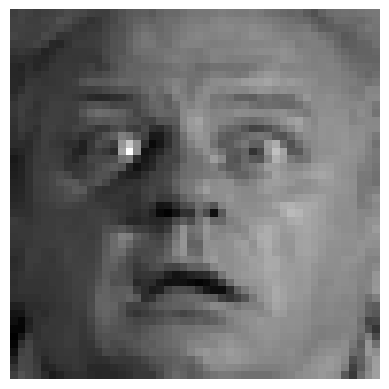

In [18]:
show(test_images[1000])

In [19]:

test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_to_one_hot(test_labels_flat, test_labels_count)

y_test = y_test.astype(np.uint8)

print(y_test.shape)

(3589, 7)


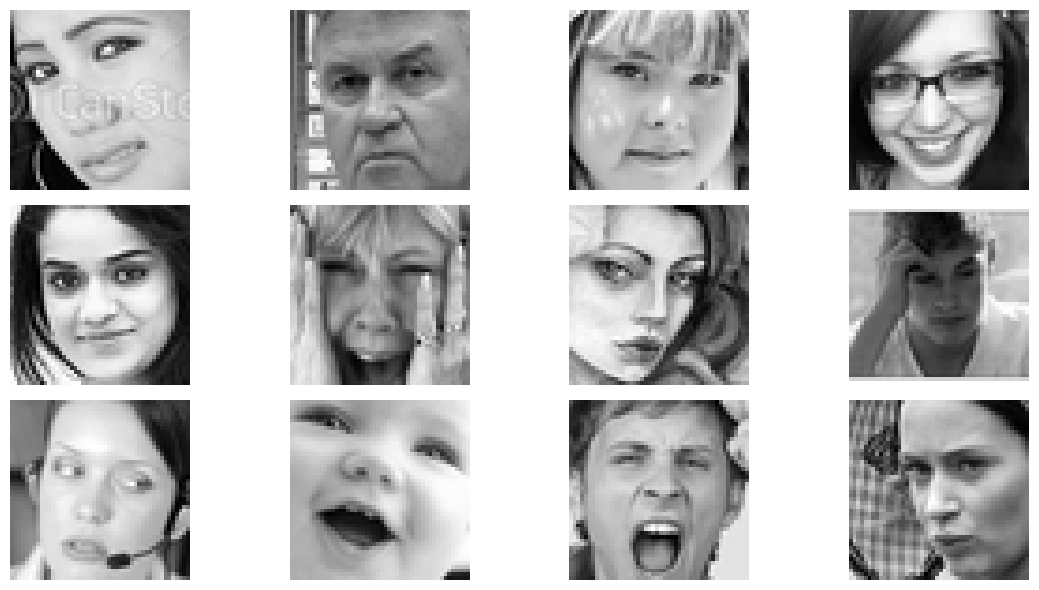

In [20]:
plt.figure(0,figsize=(12,6))
for i in range(1,13):
  plt.subplot(3,4,i)
  plt.axis("off")

  image=test_images[i].reshape(48,48)
  plt.imshow(image,cmap="gray")

plt.tight_layout()
plt.show()


In [22]:
model=Sequential()

#1.katman
model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
#2.katman
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)
#3.katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
#4.katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
#5.katman
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)
#tam katman
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6))


##çıkış katmanları
model.add(Dense(7))
model.add(Activation("softmax"))#sınıflandurma işlemi
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics={"accuracy"})
#gorselleşitime
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 46, 46, 64)        256       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 46, 46, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_7 (Bat  (None, 44, 44, 64)        256       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 44, 44, 64)       

In [23]:
x_train=train_images.reshape(-1,48,48,1)
x_test=test_images.reshape(-1,48,48,1)


print("Train:",x_train.shape)
print("Test",x_test.shape)

Train: (28709, 48, 48, 1)
Test (3589, 48, 48, 1)


In [32]:
print("Train:",y_train.shape)
print("Test",y_test.shape)

Train: (28709, 7)
Test (3589, 7)


In [40]:
# en başarılı ağırlıkları kaydet
checkpointer = ModelCheckpoint(filepath=root + 'face_model.h5', verbose=1, save_best_only=True)

epochs = 10
batchSize = 100

# modeli çalıştır
hist = model.fit(x_train,y_train,epochs=epochs,shuffle=True,batch_size=batchSize,validation_data=(x_test,y_test),callbacks=[checkpointer],verbose=2)
# save model to json
model_json = model.to_json()
with open(root + 'face_model.json', 'w') as json_file:
  json_file.write(model_json)


Epoch 1/10


ValueError: ignored

NameError: ignored

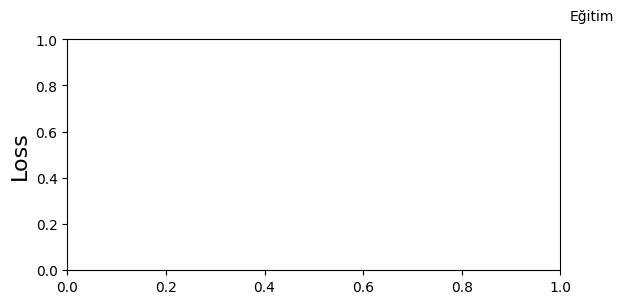

In [39]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color ='r', label='Training Loss')
plt.plot(hist.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

In [41]:

test = data[["emotion", "pixels"]][data["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))

test.head()


,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [42]:

x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])

In [45]:

x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = np_cateorical.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

NameError: ignored

In [46]:

score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("PrivateTest üzerindeki doğruluk durumu:", score)

ValueError: ignored

In [47]:

from keras.models import load_model
from PIL import Image
from keras.preprocessing import image

In [48]:
model_host=load_model(root+"data/face_model.h5")

OSError: ignored

In [49]:

os.chdir('/gdrive/My Drive/SSA/SSA_3/Duygu_Tanima/images')

FileNotFoundError: ignored

In [50]:

!ls

 Duygu_tanima.ipynb  'matris vektor.ipynb'   save_models
 fer2013	      RakamTanima_CNN.py     Untitled6.ipynb
 images		      Rakam_Tanima.ipynb     VGG16_NesneTanima.ipynb


In [51]:
#test_image=x_test_private[60] #eğer veri kümesinden bir görsel denemek isterseniz burada [] içine rastgele bir görsel numarası atayarak test edebilirsiniz!

image_path = root + "images/brando.png"

test_image_original = image.load_img(image_path) # orjinal renkli görüntü

test_image = image.load_img(image_path, target_size=(48, 48), grayscale=True)
test_data = image.img_to_array(test_image)

test_data = np.expand_dims(test_data, axis=0)
test_data = np.vstack([test_data])

results = model_best.predict(test_data, batch_size=1)
results


FileNotFoundError: ignored

In [52]:

#sınıflarımız 7 adet duygu durumumuz
class_names = ['kizgin', 'igrenme', 'korku', 'mutlu', 'uzgun', 'sasirma', 'dogal']

ind = 0.1+0.6*np.arange(len(class_names))
width = 0.4  #bar genişliği

color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']

# test resmimizi çizdirelim

plt.imshow(test_image_original)
plt.title('Giriş Resmi', fontsize=16)
plt.axis('off')
plt.show()

#sonuçlarımızı renklendirelim

for i in range(len(class_names)):
  plt.bar(ind[i], results[0][i], width, color=color_list[i])

plt.title("Sınıflandırma Sonuçları", fontsize=20)
plt.xlabel("Yüz İfadeleri Kategorisi",fontsize=16)
plt.ylabel("Sınıflandırma Skoru",fontsize=16)
plt.xticks(ind, class_names, rotation=45, fontsize=14)
plt.show()


print("Sınıflandırma sonucu en yüksek oranla:", class_names[np.argmax(results)])

# en yüksek skorlu duyguya karşılık emoji çizdirelim

emojis_img = image.load_img(root + 'images/emojis/%s.png'% str(class_names[np.argmax(results)]))

plt.imshow(emojis_img)
plt.axis('off')
plt.show()


NameError: ignored